In [78]:
import numpy as np
import pandas as pd
import gpxpy

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.basemap import Basemap


# 1

## 1.1


In [69]:
## GPS轨迹文件
gpx_file = open('/Users/HYF/Documents/jupyter/Data_vis/Reference/12.道路轨迹浓度绘制/223E9EB9-9825-4229-85A8-8EEA3CE0093C.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
## 浓度文件
data = pd.read_csv('//Users/HYF/Documents/jupyter/Data_vis/Reference/12.道路轨迹浓度绘制/下午数据.txt', sep="\t", skiprows=(1,2),)#encoding = 'utf-8')

In [70]:
!yd parse

[parse]
美音: [pɑrs] 英音: [pɑːz]
基本词典:
	vt. 解析；从语法上分析
	vi. 理解；从语法上分析
	n. 从语法上分析；分列
网络释义:
	Parse: 解析
	Parse Error: 解析错误; 语法错误
	evening parse: 女晚用珠包
	Transform Parse: 转换分析; 转换剖析


In [71]:
data.columns[1:]

Index([u'C2H2', u'C2H4', u'C2H6', u'C3H6', u'C3H8', u'C4H8', u'C4H10', u'C5H8',
       u'C5H10', u'C5H12', u'C6H6', u'C6H12', u'C6H14', u'C7H8', u'C7H14',
       u'C7H16', u'C8H8', u'C8H10', u'C8H18', u'C9H12', u'C9H20', u'C10H14',
       u'C10H22', u'C11H24', u'C12H26'],
      dtype='object')

In [72]:
for track in gpx.tracks:
    print track

GPXTrack(segments=[GPXTrackSegment(points=[...])])


In [73]:
df.head()

,lat,lon,time,C2H2,C2H4,C2H6,C3H6,C3H8,C4H8,C4H10,...,C7H16,C8H8,C8H10,C8H18,C9H12,C9H20,C10H14,C10H22,C11H24,C12H26
0,39.991003,116.309357,2017-04-26 15:16:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39.991040,116.309353,2017-04-26 15:16:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.991042,116.309338,2017-04-26 15:16:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39.991042,116.309338,2017-04-26 15:16:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39.991052,116.309356,2017-04-26 15:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
### 轨迹文件预处理
route = {'lat':[], 'lon':[], 'time':[]}
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route['lat'].append(point.latitude)
            route['lon'].append(point.longitude)
            route['time'].append(point.time)
df = pd.DataFrame(route)            
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

In [75]:
### 利用“时间”对应轨迹和测试浓度
for col in data.columns[1:]:
    df[col] = np.nan
k = []
for j in range(len(data)):
    k.append(df.loc[df['time'].astype(str).str[11:16] == data.Time.iloc[j]].index.values[0])
    
for i in range(len(k)):
    for col in data.columns[1:]:
        df[col].iloc[k[i]:] = data[col].iloc[i]
#     if i == (len(k)-1):
#         df[col].iloc[k[i]:] = data[col].iloc[i]
print "DONE"

DONE


In [85]:
data

,Time,C2H2,C2H4,C2H6,C3H6,C3H8,C4H8,C4H10,C5H8,C5H10,...,C7H16,C8H8,C8H10,C8H18,C9H12,C9H20,C10H14,C10H22,C11H24,C12H26
0,15:28,0.275343,--,--,0.156764,--,0.098717,0.245568,0.256380,0.140946,...,6.633796,0.034968,0.102680,0.580514,0.036978,1.213783,0.040255,4.588736,0.530984,0.222834
1,15:37,0.123017,--,--,0.165667,--,0.067372,0.191807,0.168912,0.121080,...,2.989580,0.035032,0.130581,0.444896,0.040416,0.810051,0.041477,1.989544,0.538653,0.191230
2,15:46,0.131244,--,--,0.112290,--,0.041104,0.165044,0.129249,0.086463,...,2.400872,0.024518,0.083470,0.362963,0.023296,0.542375,0.024135,1.888960,0.707126,0.005513
3,15:55,0.147697,--,--,0.157966,--,0.028425,0.153117,0.094130,0.072951,...,1.621700,0.025988,0.076871,0.300066,0.019046,0.590644,0.025983,1.838668,0.492706,-0.011897
4,16:04,0.188829,--,--,0.127427,--,0.029791,0.141626,0.116303,0.080987,...,2.123833,0.021724,0.084262,0.276893,0.019288,0.336132,0.022816,2.995380,0.446759,0.086765
5,16:13,0.164149,--,--,0.155842,--,0.050532,0.163880,0.113686,0.112956,...,2.799115,0.039517,0.105239,0.318273,0.025106,0.796887,0.032278,1.587209,0.477390,0.075157


In [76]:
### 以绘制C2H2 为例子

#### 输入变量
start     =  480
end       =  -1
species   =  'C2H2'
x,y,z = df['lon'].iloc[start:end],df['lat'].iloc[start:end],df[species].iloc[start:end],
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

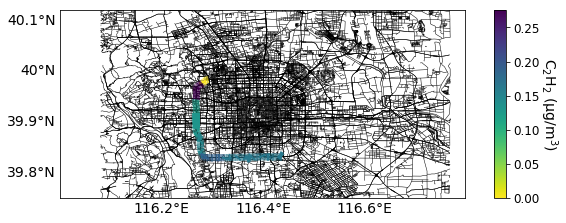

In [94]:
xc1,xc2,yc1,yc2 = 116.2,116.61, 39.75,40.12
fig=plt.figure(figsize=(8,6))
ax=plt.subplot()
map = Basemap(llcrnrlon=xc1,llcrnrlat=yc1,urcrnrlon=xc2,urcrnrlat=yc2)
map.readshapefile('/Users/HYF/Documents/jupyter/Data_vis/Reference/12.道路轨迹浓度绘制/Beijing-shp/shape/roads','roads',zorder =1)

map.drawparallels(np.arange(39.8,40.1,0.1), labels=[1, 0, 0, 0],linewidth =0, fontsize = 14)
map.drawmeridians(np.arange(116.2, 116.85, 0.2), labels=[0, 0, 0, 1], linewidth =0,fontsize = 14)


lc = LineCollection(segments, cmap=plt.get_cmap('viridis_r'),
                    norm=plt.Normalize(0, z.max()))
lc.set_array(z)
lc.set_linewidth(7)
kk = ax.add_collection(lc)
kk.zorder = 2


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.4)
cbar = plt.colorbar(kk, cax=cax)  
cbar.ax.tick_params(labelsize = 12)
cbar.ax.set_ylabel( r'$\mathregular{C_2H_2\ (\mu g/m^3)}$', rotation=270,labelpad = 20.0,fontsize = 14)

output ="/Users/HYF/Documents/jupyter/Data_vis/Reference/12.道路轨迹浓度绘制/" +species
plt.savefig(output+'.pdf')
plt.show()